<a href="https://www.kaggle.com/code/alexmcdonald1124/telecom-churn-prediction?scriptVersionId=97043506" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv("/kaggle/input/ml-lab-i-c37/train.csv")

In [16]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [17]:
print(df.groupby('churn_probability').size())

churn_probability
0    62867
1     7132
dtype: int64


### Churn Probability Ratio

The churn probability is drastically lower than those who stay with the carrier. Hopefully this will make a binary classifier easier to predict. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='churn_probability', ylabel='count'>

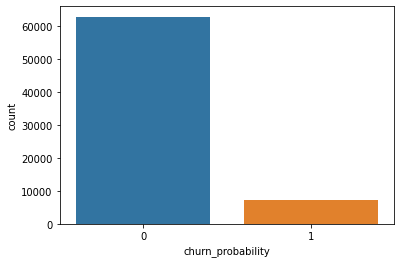

In [18]:
sns.countplot(df["churn_probability"], label="Count")

### Why do customers switch carriers?

Research seems to indicate cost and service quality are the main reasons customers switch carriers. With that said, it will be important to include financial figures in the data model where possible. Source: https://www.huffpost.com/entry/why-do-consumers-switch-m_b_6525492

### KNN

Due to the classifier only falling into two outputs, we will use a K-nearghest neighbor to predict the output. Any feature with no cardinality of high carindality (i.e. serialized columns like the id) will be removed. For those colums with a high level of cardinality, it will be determined what the data type is. A integer or float can remain while anything text-based and requiring encoding/dummies will need to be re-evaluated into a specific set of categories, with the remaining scarce entries assigned as "other".

### Clean Data

Need to remove columns of data that provide less value and no cardinality, i.e. serial numbers associated with each record or other columns with single unique values.

In [21]:
df.drop(columns=["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "id", "circle_id", "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "fb_user_6", "fb_user_7", "fb_user_8"])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,1,0,0,0,0,710,0.00,0.00,0.00,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,882,0.00,0.00,0.00,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,982,0.00,0.00,0.00,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,0,0,1,0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,...,0,0,0,1,0,221,0.00,0.00,0.00,0
69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,...,0,0,0,0,0,712,0.00,0.00,0.00,0
69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,0.00,...,0,0,0,0,0,879,0.00,0.00,0.00,0
69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,25.06,...,1,1,0,0,0,277,664.25,1402.96,990.97,0


In [22]:
# Tokenize text based columns
df=pd.get_dummies(df)

In [23]:
# Clean the data with NaN values
for column in df.loc[:, df.isna().any()]:
    df = df.fillna(df[[column]].mean())

### k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != "churn_probability"], df["churn_probability"], stratify=df["churn_probability"], random_state=66)

### Testing Neighbors

Running through the test of KNN shows a general sweet spot between 8 - 10 neighbors. This can be a good number to use for the remaining data models. 

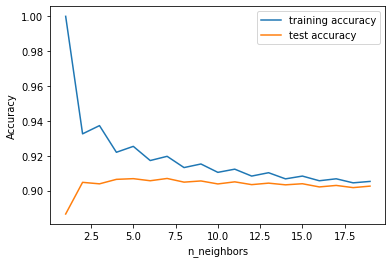

In [25]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

### KNN Output

An accuracy of 91% is a good start. Let's try this on a Random Forest classifier.

In [26]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print("Accuracy of K-NN classifier on training set: {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.91


### Random Forest

Adding in a large number of estimators appears to overfit the model with a training score of 100%. Let's lower it to see if we can generate better output. We will use 8 estimators this time which is in line with what we used in the last exercise. 

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.938


A retest proves this may be a good model for this particular use case. We will try a few other algorithms first.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=8, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.934


### Logistic Regression

Provides good good accuracy. May be a solid backup to Random Forest or KNN if it is efficient. 

In [30]:
from sklearn.linear_model import LogisticRegression

logreg001 = LogisticRegression(C=0.01, max_iter = 70000).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.931
Test set accuracy: 0.928


### Decision Tree

This model appear to overfit when runnning and may not be as useful as a Random Forest for this use case.

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.906


Given the results and efficiency of a Random Forest, we will select this for our data model. Let's plot the features by importance to get a better sense of what weighting each value can bring. 

In [32]:
def plot_feature_importances(features, values):
    plt.figure(figsize=(20,8))
    n_features = 20
    plt.barh(range(n_features), sorted(rf.feature_importances_)[-20:], align="center")
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

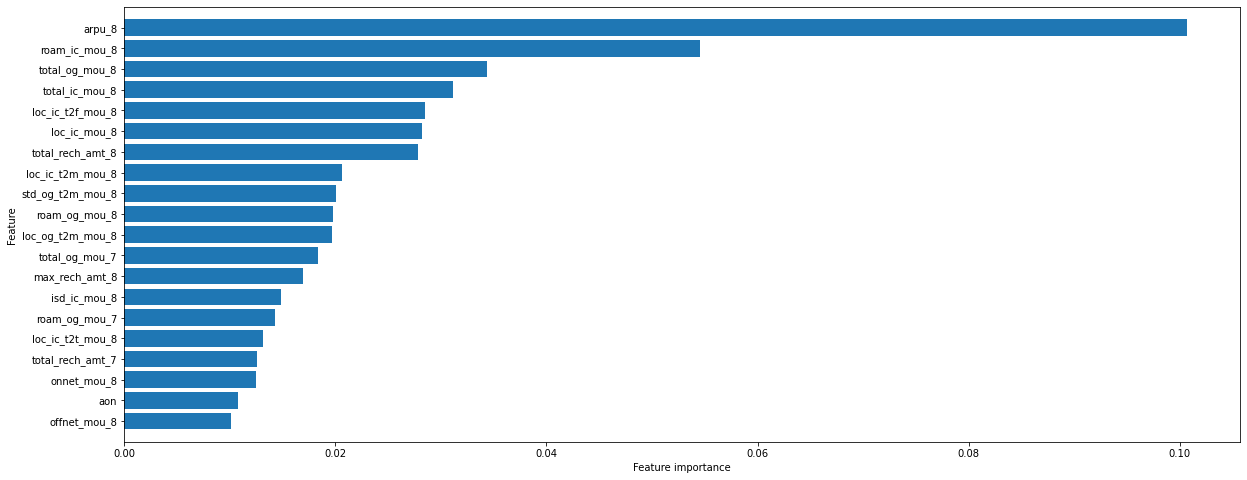

In [33]:
entries = []
for entry in sorted(rf.feature_importances_)[-20:]:
    entries.append(list(rf.feature_importances_).index(entry))
telecom_features = [x for i,x in enumerate(df.columns)]
sorted(rf.feature_importances_)[-20:]
features = [X_train.columns[entry] for entry in entries]
plot_feature_importances(features, values=entries)
plt.savefig("feature_importance")

### Feature Importance

As we see with the various classification algorithms, the sweet spot is in the range of 8 - 10 features of importance. The feature importance in Random Forest indicates that the average revenue per user is likely the biggest factor in deciding to move off of a specific carrier. Another major factor appears to be the number of both incoming and outgoing calls. If the model is accurate, it appears churn can be predicted if a user 1. Needs to make a lot of calls (both outgoing and incoming). 2. Does not want to pay a heavy costs for and will likely switch carriers to gain the benefits of an entry-level contract. 

### Age on Network vs. Average Revenue

There is a clear correlation to the average revenue of a user vs. the age on the network. Most high churn probability customers exist on the network for an average lower number of days but have a disproportionately higher amount of calls.

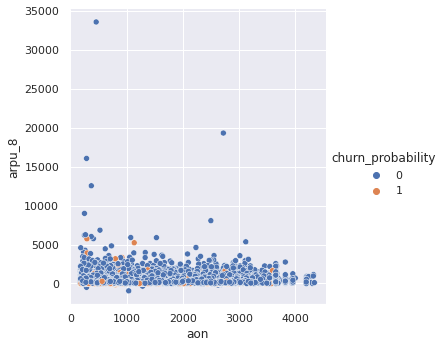

In [34]:
sns.set_theme(style="darkgrid")
sns.relplot(x="aon", y="arpu_8", hue="churn_probability", data=df);

Text(0, 0.5, 'Churn Probability')

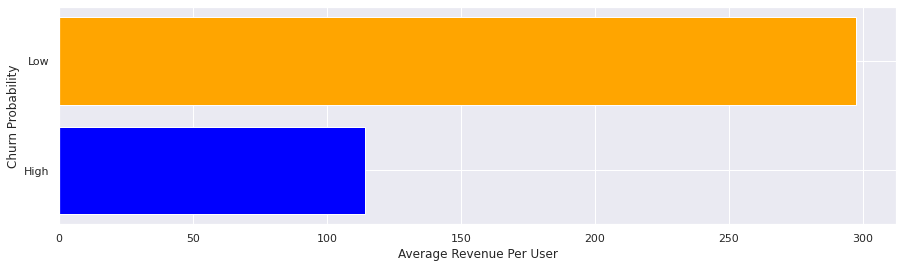

In [35]:
high_churn_arpu = df[(df["churn_probability"] == 1)]["arpu_8"].mean()
low_churn_arpu = df[(df["churn_probability"] == 0)]["arpu_8"].mean()
plt.figure(figsize=(15,4))
n_features = 2
plt.barh(range(n_features), [high_churn_arpu, low_churn_arpu], align="center", color=["blue", "orange"])
plt.yticks(np.arange(n_features), ["High", "Low"])
plt.xlabel("Average Revenue Per User")
plt.ylabel("Churn Probability")

Text(0, 0.5, 'Churn Probability')

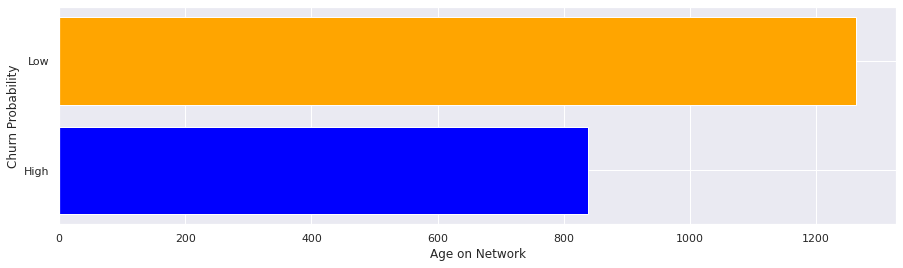

In [36]:
high_churn_arpu = df[(df["churn_probability"] == 1)]["aon"].mean()
low_churn_arpu = df[(df["churn_probability"] == 0)]["aon"].mean()
plt.figure(figsize=(15,4))
n_features = 2
plt.barh(range(n_features), [high_churn_arpu, low_churn_arpu], align="center", color=["blue", "orange"])
plt.yticks(np.arange(n_features), ["High", "Low"])
plt.xlabel("Age on Network")
plt.ylabel("Churn Probability")

(-1.0, 2.0)

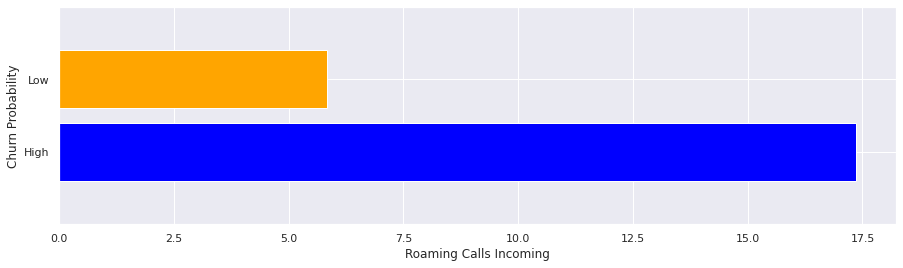

In [37]:
high_churn_arpu = df[(df["churn_probability"] == 1)]["roam_ic_mou_8"].mean()
low_churn_arpu = df[(df["churn_probability"] == 0)]["roam_ic_mou_8"].mean()
plt.figure(figsize=(15,4))
n_features = 2
plt.barh(range(n_features), [high_churn_arpu, low_churn_arpu], align="center", color=["blue", "orange"])
plt.yticks(np.arange(n_features), ["High", "Low"])
plt.xlabel("Roaming Calls Incoming")
plt.ylabel("Churn Probability")
plt.ylim(-1, n_features)

(-1.0, 2.0)

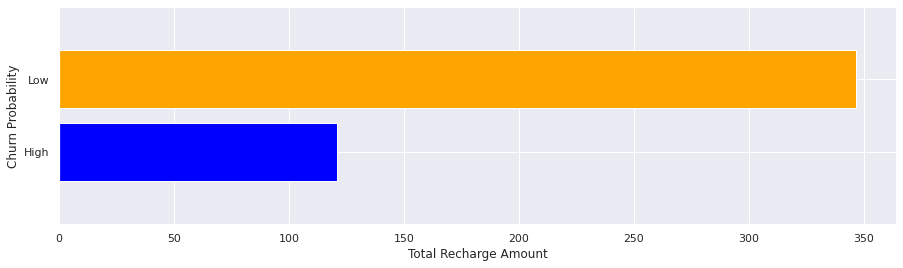

In [38]:
high_churn_arpu = df[(df["churn_probability"] == 1)]["total_rech_amt_8"].mean()
low_churn_arpu = df[(df["churn_probability"] == 0)]["total_rech_amt_8"].mean()
plt.figure(figsize=(15,4))
n_features = 2
plt.barh(range(n_features), [high_churn_arpu, low_churn_arpu], align="center", color=["blue", "orange"])
plt.yticks(np.arange(n_features), ["High", "Low"])
plt.xlabel("Total Recharge Amount")
plt.ylabel("Churn Probability")
plt.ylim(-1, n_features)